In [1]:
import torch

`autograd` package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework.
If you set `.requires_grad` as `True`, it starts to track automatically every operations on the Tensor, so when you call `.backward()` you have all the gradients computed automatically. To prevent future history tracking, you can call `.detach()`, to detach it from computation history.

In [3]:
tensor1 = torch.ones(5, 3, requires_grad = True)
print(tensor1)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [8]:
tensor2 = tensor1 + 2
print(tensor2)

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<AddBackward0>)


In [10]:
tensor2.grad_fn

In [15]:
with torch.no_grad():
    print(tensor1 + 4)

tensor([[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]])


Torchvision package contains datasets like MNIST to be loaded in runtime. It also have transformation functions to transform data coming from the dataset.

In [4]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

100.1%

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


113.5%

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


100.4%

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


180.4%

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [5]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

*testset* and *trainset* are arrays of arrays, containg data we have in the original dataset but separeted by batches.

In [36]:
for d in testset:
    print(d)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

tensor(0)


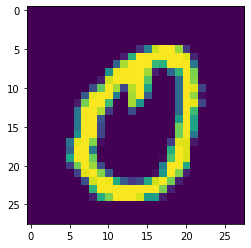

In [54]:
image = []
for d in testset:
    print(d[1][0])
    image = d[0][0]
    break

import matplotlib.pyplot as plt
# by default the image comes as [1, 28, 28] shaping, so we need to make it be [28, 28] because the image have the dimension 28x28
imagereshape = image.view(28, 28)
plt.imshow(imagereshape)

In [55]:
import torch.nn as nn
import torch.nn.functional as F

the class `Net` will be the Neural Network. Initializing *nn.Module*, our *Net* class will inherit the methods and attributes.

In the `__init__` method we will define the fully connected layers.

`nn.Linear` accepts two parameters, the first one is the input, for the first layer (the input layer), we will set the `input` parameter to `28 * 28` because our image have dimension of `28x28`

In [60]:
class Net(nn.Module):
    def __init__(self):
        # Initialize nn.Module
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, inp):
        inp = F.relu(self.fc1(inp))
        inp = F.relu(self.fc2(inp))
        inp = F.relu(self.fc3(inp))
        
        return F.log_softmax(self.fc4(inp), dim = 1)

In [59]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


`rand_t` is a tensor of *28x28* with random numbers in it.

after creating the tensor, we have to reshape it to be flat, the first parameters in `rand_t.view()` is very important, it says that we are flattening the multidimensional array of `28 x 28` to a single dimension array of `784` items, or 28 * 28

In [68]:
rand_t = torch.rand((28, 28))
rand_t = rand_t.view(1, 28 * 28)
print(rand_t)

tensor([[8.0518e-02, 4.3279e-01, 9.3872e-01, 4.1962e-01, 6.2357e-01, 2.9021e-01,
         2.6606e-01, 2.8769e-01, 6.3534e-01, 9.3298e-01, 2.8463e-02, 3.9194e-01,
         5.6457e-01, 5.0258e-02, 9.8753e-01, 4.8648e-01, 7.0875e-01, 9.5541e-01,
         7.9751e-01, 9.6972e-02, 9.5851e-01, 8.5222e-01, 3.2154e-02, 1.2424e-01,
         2.2151e-01, 1.5461e-01, 4.1052e-01, 2.0070e-01, 5.9621e-01, 2.0963e-01,
         9.2633e-01, 9.0746e-01, 4.8457e-02, 8.4984e-01, 2.7668e-01, 3.4002e-01,
         9.6983e-01, 4.3146e-01, 4.4559e-01, 1.1741e-01, 1.5673e-01, 3.6769e-01,
         6.6580e-01, 7.9854e-01, 8.2705e-02, 4.9180e-01, 5.7894e-01, 2.2023e-01,
         1.2759e-01, 7.9538e-01, 8.2174e-01, 3.6891e-01, 8.0748e-01, 7.8403e-01,
         4.4740e-01, 8.2347e-02, 1.0628e-01, 3.0753e-02, 8.0374e-01, 4.8773e-01,
         7.7784e-01, 9.8443e-01, 2.0135e-01, 5.7285e-01, 6.4198e-01, 2.5696e-01,
         7.1533e-01, 7.4506e-01, 5.1155e-01, 8.9545e-01, 9.4675e-01, 9.9355e-01,
         1.9828e-01, 3.0880e

In [65]:
output = net(rand_t)

In [66]:
output

tensor([[-0.0634, -0.0735, -0.1143,  0.1129,  0.0659,  0.1179,  0.1769, -0.0504,
          0.0133,  0.1641]], grad_fn=<AddmmBackward>)